### Exercise Sheet 3

#### 4 Data Generation with QDA

In [1]:
from sklearn . datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

digits = load_digits ()
#print ( digits . keys () )

data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]



# function from sample solution!!!
def fit_qda(training_features, training_labels):
    """
    This function compute for each class: mean, covariance matrix and priors
    
    input training_features: N_training x 2 numpy array 
    input training_labels: N_training x 1 numpy array
    output: mu: N_labels x 2
    output: cov: N_labels x 2 x 2
    output: p: N_labels x 1
    """ 
    mu, cov, p = [], [], []
    for label in np.unique(training_labels):
        # filtering the correct class
        data = training_features[training_labels == label]
        
        # mean
        mean = np.mean(data, axis=0)
        mu.append(mean)
        
        # Covariance 
        # Computed as in textbook
        # data_centered = data - mean
        # cov.append(np.dot(data_centered.T, data_centered)/data.shape[0])
        
        # as numpy oneliner
        cov.append(np.cov(data.T))
        
        # Prior
        p.append(data.shape[0]/training_features.shape[0])
        
    return mu, cov, p

In [2]:
data_1 = data[target == 1]
label_1 = target[target == 1]
data_6 = data[target == 6]
label_6 = target[target == 6]

mu_1, cov_1, p_1 = fit_qda(data_1, label_1)
mu_6, cov_6, p_6 = fit_qda(data_6, label_6)

mu1 = np.asarray(mu_1)
mu6 = np.asarray(mu_6)
cov1 = np.asarray(cov_1)
cov6 = np.asarray(cov_6)

out_1 = np.random.multivariate_normal(mu1[0], cov1[0],8)
out_6 = np.random.multivariate_normal(mu6[0], cov6[0],8)

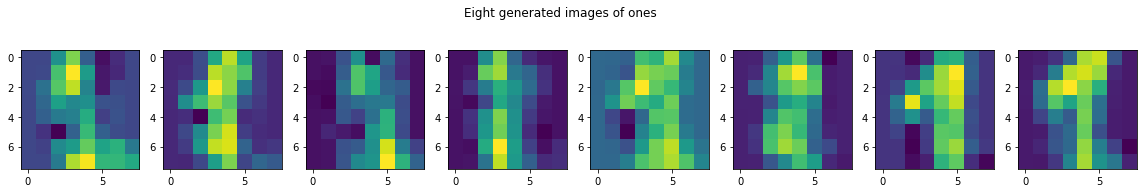

In [32]:
fig, axs = plt.subplots(1, 8,figsize=(20,3))
fig.suptitle('Eight generated images of ones')
for i in range(0,8,1):
    one = np.reshape(out_1[i], [8,8])
    axs[i].imshow(one)

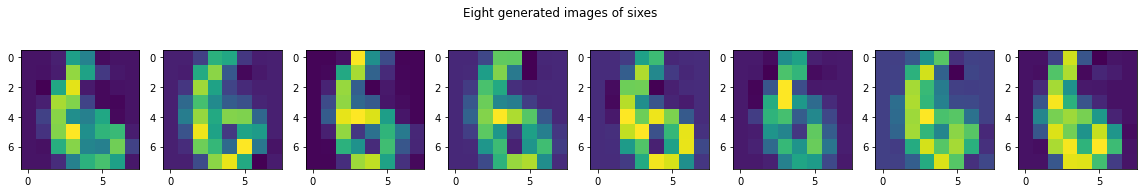

In [33]:
fig, axs = plt.subplots(1, 8,figsize=(20,3))
fig.suptitle('Eight generated images of sixes')
for i in range(0,8,1):
    six = np.reshape(out_6[i], [8,8])
    axs[i].imshow(six)

Comments:

The results are not very good compared to the original data. Most of the number can be reognized, but without knowing beforehand which number it is, some can not be assigned to their corresponding correct value. One could improve the results by having more features. 64 aren't that many, so guessing one wrong can already make it difficult to ready the number correctly. QDA only consideres normal distriuted class densities. This does not have be true for those digits. Furthermore more samples would be need (only 64 features and ~170 images per class).